In [1]:
#PyTorch是Torch在python的衍生，Torch是使用Lua语言的神经网络库，PyTorch 说他就是在神经网络领域可以用来替换 numpy 的模块
#最大优点就是建立的神经网络是动态的，静态Tensorflow（分布式训练）,
#torch 产生的 tensor 放在 GPU 中加速运算，Numpy 会把 array 放在 CPU 中加速运算

#转换
import torch
import numpy as np
%matlplotlib inline
import torch.nn.functional as F
np_data=np.arange(-1,5).reshape((2,3))
torch_data=torch.from_numpy(np_data)
tensor2array=torch_data.numpy()

print(np_data,torch_data,tensor2array)



[[-1  0  1]
 [ 2  3  4]] 
-1  0  1
 2  3  4
[torch.IntTensor of size 2x3]
 [[-1  0  1]
 [ 2  3  4]]


In [2]:
#abs求绝对值
print(np.abs(np_data),torch.abs(torch_data))

#mean  求均值

[[1 0 1]
 [2 3 4]] 
 1  0  1
 2  3  4
[torch.IntTensor of size 2x3]



In [3]:
data=[[1,2],[3,4]]
#转成32位浮点tensor
tensor=torch.FloatTensor(data)
#矩阵乘法
print(np.matmul(data,data))
print(torch.matmul(tensor,tensor))

data = np.array(data)
#点乘
print(data.dot(data))


[[ 7 10]
 [15 22]]

  7  10
 15  22
[torch.FloatTensor of size 2x2]

[[ 7 10]
 [15 22]]


In [4]:
#Variable存放的值是变化的

from torch.autograd import Variable # torch 中 Variable 模块

# requires_grad是参不参与误差反向传播, 要不要计算梯度
variable = Variable(tensor, requires_grad=True)
print(variable)

#求均值
t_m=torch.mean(tensor*tensor)
v_m=torch.mean(variable*variable)
#上面计算其实等价下面计算
#v_m=1/4*sum(variable*variable)


#对上面反向求梯度
#v_m_g=1/4*2*variable=1/2*variable
#通过上面计算也就求的响应的梯度值
#v_m的误差反向传递
v_m.backward()
print('\n梯度：',variable.grad)
print('\n',t_m,v_m)


print('tensor 形式',variable.data)

print('numpy 形式',variable.data.numpy())

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]


梯度： Variable containing:
 0.5000  1.0000
 1.5000  2.0000
[torch.FloatTensor of size 2x2]


 7.5 Variable containing:
 7.5000
[torch.FloatTensor of size 1]

tensor 形式 
 1  2
 3  4
[torch.FloatTensor of size 2x2]

numpy 形式 [[ 1.  2.]
 [ 3.  4.]]


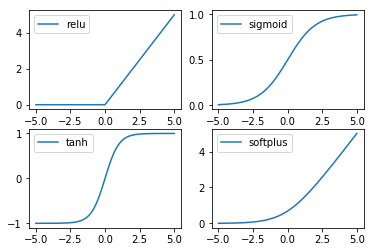

In [5]:
#激励函数activation function
#要确保的是这些激励函数必须是可以微分的, 因为在 backpropagation 误差反向传递的时候, 只有这些可微分的激励函数才能把误差传递回去
#选取时需要注意梯度爆炸，梯度消失
#卷积神经网络推荐用relu，循环神经网络推荐用tanh,relu

#常用的几种激励函数
import matplotlib.pyplot as plt

x=torch.linspace(-5,5,250)
x=Variable(x)
n_num=x.data.numpy()

y_relu=torch.nn.functional.relu(x).data.numpy()
y_sigmoid=torch.nn.functional.sigmoid(x).data.numpy()
y_tanh=torch.nn.functional.tanh(x).data.numpy()
y_softplus=torch.nn.functional.softplus(x).data.numpy()


plt.figure()

    
    
plt.subplot(2,2,1)
plt.plot(n_num,y_relu,label='relu')
plt.legend(loc='best')
# ax=plt.gca()
# ax.spines['left'].set_position(('data',0))

plt.subplot(2,2,2)
plt.plot(n_num,y_sigmoid,label='sigmoid')
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.plot(n_num,y_tanh,label='tanh')
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.plot(n_num,y_softplus,label='softplus')
plt.legend(loc='best')


plt.show()



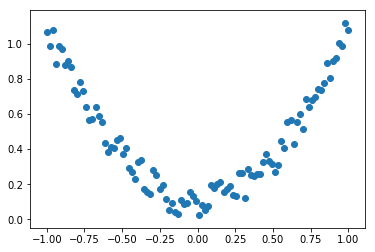

Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


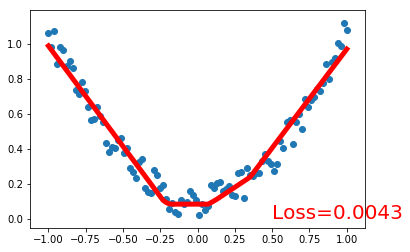

In [15]:
#关系拟合（回归）

#数据模拟
#数据100*1，如果dim设置0数据是1*100
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)+0.2*torch.rand(x.size())

x,y=Variable(x),Variable(y)


plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()


#建立神经网络

class Net(torch.nn.Module):# 继承 torch 的 Module
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()#继承__init__功能
        #定义每层用什么形式
        
        #隐藏层线性输出
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        
        #输出层线性输出
        self.predict=torch.nn.Linear(n_hidden,n_output)
        
     # 这同时也是 Module 中的 forward 功能
    def forward(self,x):
        #正向传播输入值，神经网络输出值
        
        #激励函数（隐藏层线性值）
        x=F.relu(self.hidden(x))
        #输出值
        x=self.predict(x)
        return x
    
net=Net(n_feature=1,n_hidden=10,n_output=1)

print(net)
            
#训练网络
#optimizer是训练的工具
#需传入 net 的所有参数, 学习率
optimizer=torch.optim.SGD(net.parameters(),lr=0.5)

#损失函数预测值和真实值的误差计算公式 (均方差)
loss_func=torch.nn.MSELoss()


plt.ion()   # 画图
plt.show()
for t in range(100):
    #传训练数据x,输出预测值
    prediction=net(x)
    
    #计算误差
    loss=loss_func(prediction,y)
    # 清空上一步的残余更新参数值
    optimizer.zero_grad()
    
    # 误差反向传播, 计算参数更新值
    loss.backward()
    
    # 将参数更新值施加到 net 的 parameters 上
    optimizer.step()
    if t %5==0:
        
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r--',lw=5)
        plt.text(0.5,0,'Loss%.4f'%loss.data[0],fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
        plt.ioff()
        plt.show()
    
